In [9]:
# Run this cell
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

from ipynb.fs.full.preprocessing import readFile, calcClass

X_train, X_test, y_train, y_test, df, df_train, cols = readFile()
y_train_class, y_test_class = calcClass(y_train, y_test)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
parameter_space = {
    'hidden_layer_sizes': [(1), (3), (5), (7), (9), (11), (13), (15), (17), (19), (21), (23), (25), (27), (29)],
    'activation': ['tanh', 'logistic', 'relu'],
    'alpha': [.0001, .01, 1],
}

mlp = MLPClassifier(max_iter=5000, random_state=42)

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, return_train_score=True)
clf.fit(X_train, y_train_class)

print(clf.best_params_)
print(clf.best_score_)

{'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': 23}
0.7589430213739606


In [11]:
df = pd.concat([pd.DataFrame(clf.cv_results_["params"]),pd.DataFrame(clf.cv_results_["mean_train_score"], columns=["mean train score"]), pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["mean test score"])],axis=1)
df.to_csv('neurals.csv')

Text(0, 0.5, 'Mean Test Accuracy')

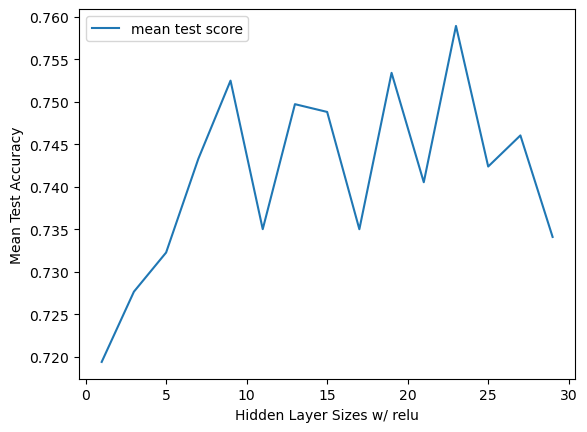

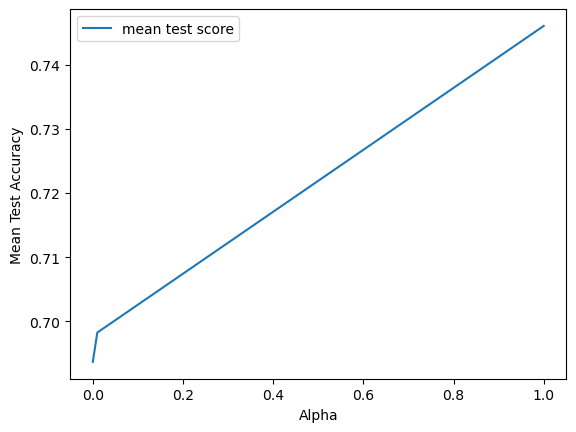

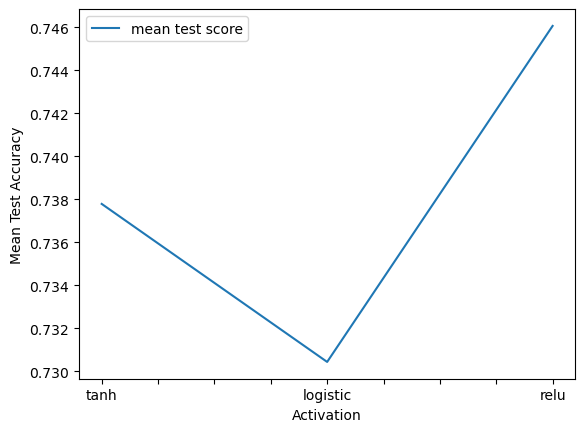

In [12]:
# fix all parameters but hidden_layer_size to its best value
    # plot hidden_layer_size vs accuracy
df_relu = df.loc[df['activation'] == 'relu']
df_relu_alpha = df_relu.loc[df_relu['alpha'] == 1]
plt1 = df_relu_alpha.plot(x='hidden_layer_sizes', y='mean test score', legend='upper center')
plt1.set_xlabel("Hidden Layer Sizes w/ relu")
plt1.set_ylabel("Mean Test Accuracy")


# repeat
df_relu_hls = df_relu.loc[df_relu['hidden_layer_sizes'] == 27]
plt2 = df_relu_hls.plot(x='alpha', y='mean test score', legend='upper center')
plt2.set_xlabel("Alpha")
plt2.set_ylabel("Mean Test Accuracy")

df_alpha = df.loc[df['alpha'] == 1]
df_alpha_hls = df_alpha.loc[df_alpha['hidden_layer_sizes'] == 27]
plt3 = df_alpha_hls.plot(x='activation', y='mean test score', legend='upper center')
plt3.set_xlabel("Activation")
plt3.set_ylabel("Mean Test Accuracy")

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(27, 1), (27, 3), (27, 5), (27, 7), (27, 9), (27, 11), (27, 13), (27, 15)],
    'activation': ['relu'],
    'alpha': [1],
}

mlp = MLPClassifier(max_iter=5000, random_state=42)

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, return_train_score=True)
clf.fit(X_train, y_train_class)

print(clf.best_params_)
print(clf.best_score_)

In [6]:
df2 = pd.concat([pd.DataFrame(clf.cv_results_["params"]),pd.DataFrame(clf.cv_results_["mean_train_score"], columns=["mean train score"]), pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["mean test score"])],axis=1)
df2.to_csv('neurals_secondlayer.csv')

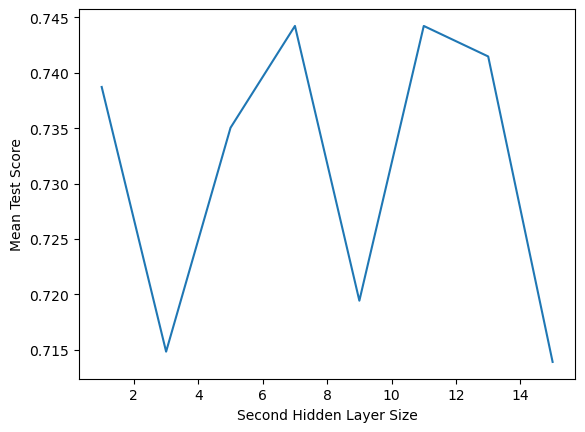

In [7]:
second_layer_size = np.array([1, 3, 5, 7, 9, 11, 13, 15])
scores = df2['mean test score'].to_numpy()
plt.plot(second_layer_size, scores)
plt.xlabel("Second Hidden Layer Size"), plt.ylabel("Mean Test Score")
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       135
           1       0.75      0.79      0.77       137

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272



Text(0.5, 1.0, 'Accuracy Score: 0.7610294117647058')

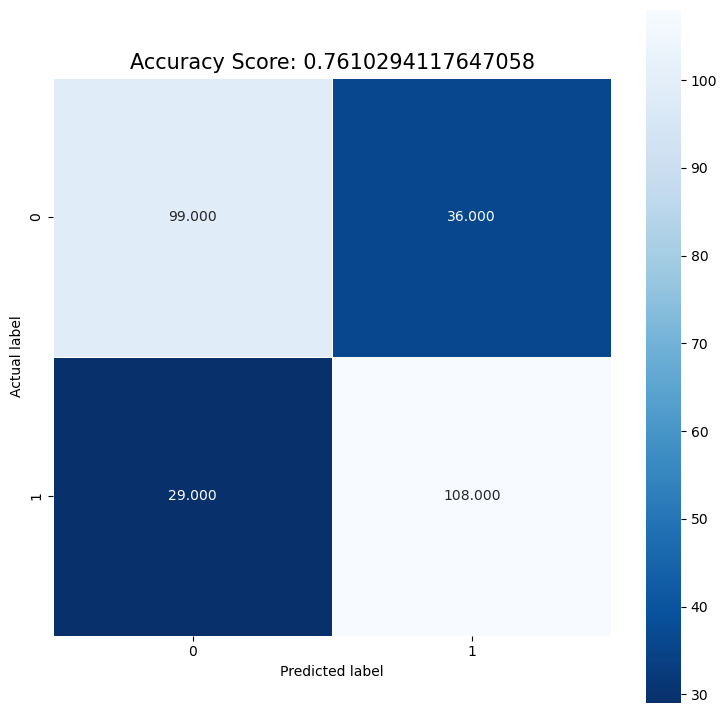

In [8]:
# confusion matrix for best algorithm
import seaborn as sns
from sklearn import metrics

clf = MLPClassifier(hidden_layer_sizes=(27),alpha=1,activation='relu',max_iter=5000, random_state=42)
clf.fit(X_train, y_train_class)
yhat_test = clf.predict(X_test)
score = clf.score(X_test, y_test_class)
cm = metrics.confusion_matrix(y_test_class, yhat_test)

print(metrics.classification_report(y_test_class, yhat_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)